In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime

In [2]:
directory = "Data/Daily_data"
stock_data = pd.DataFrame(columns=['Data', 'Otwarcie', 'Najwyzszy', 'Najnizszy', 'Zamkniecie', 'Wolumen'])

for filename in os.listdir(directory):
    file_path = os.path.join(directory, filename)
    single_stock_data = pd.read_csv(file_path)
#     single_stock_data = single_stock_data.rename(columns={'Data': 'Date', 'Otwarcie': 'Open', 'Najwyzszy': 'Highest', 'Najnizszy': 'Lowest', 'Zamkniecie': 'Close', 'Wolumen': 'Volume'})
    single_stock_data['Data'] = pd.to_datetime(single_stock_data.Data)
    single_stock_data['Spółka'] = (filename[:3]).upper()
    stock_data = stock_data.append(single_stock_data, ignore_index=True)
    print('Loaded file: ' + filename)

Loaded file: acp_d.csv
Loaded file: ale_d.csv
Loaded file: alr_d.csv
Loaded file: ccc_d.csv
Loaded file: cdr_d.csv
Loaded file: cps_d.csv
Loaded file: dnp_d.csv
Loaded file: jsw_d.csv
Loaded file: kgh_d.csv
Loaded file: lpp_d.csv
Loaded file: lts_d.csv
Loaded file: mrc_d.csv
Loaded file: opl_d.csv
Loaded file: peo_d.csv
Loaded file: pge_d.csv
Loaded file: pgn_d.csv
Loaded file: pkn_d.csv
Loaded file: pko_d.csv
Loaded file: pzu_d.csv
Loaded file: san_d.csv
Loaded file: tpe_d.csv


In [3]:
stock_data

,Data,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie,Wolumen,Spółka
0,1998-06-02,10.602,10.602,10.602,10.602,577707,ACP
1,1998-06-03,11.648,11.648,11.648,11.648,221464,ACP
2,1998-06-04,12.694,12.694,12.694,12.694,655891,ACP
3,1998-06-05,12.847,12.847,12.847,12.847,252087,ACP
4,1998-06-08,12.794,12.794,12.794,12.794,141804,ACP
...,...,...,...,...,...,...,...
83586,2021-12-14,2.580,2.596,2.528,2.530,4057613,TPE
83587,2021-12-15,2.530,2.560,2.434,2.449,5055568,TPE
83588,2021-12-16,2.491,2.560,2.466,2.480,6339348,TPE
83589,2021-12-17,2.480,2.587,2.412,2.543,14301438,TPE


In [4]:
fundamental_data = pd.read_csv('Data/WiG20_fundamental_indicators.csv')
fundamental_data

,Spółka,Kwartały,Wartość księgowa,Cena/WK,Zysk,Cena/Zysk,Przychód,Cena/Przychód,Zysk operacyjny,Cena/Zysk operacyjny,...,Rotacja należności,Cykl należności,Cykl zobowiązań,Rotacja zapasów,Cykl zapasów,Rotacja majątku obrotowego,Rotacja majątku trwałego,Rotacja majątku ogółem,Cykl operacyjny,Cykl konwersji gotówki
0,ACP,2004/Q4,6.55,4.26,0.02,1 313.53,23.01,1.21,1.03,27.17,...,2.89,126,229,19.74,18.0,1.66,2.00,0.91,144,-85
1,ACP,2005/Q4,11.27,3.46,1.75,22.32,21.18,1.84,2.06,18.94,...,3.46,105,145,20.74,18.0,1.96,2.10,1.01,123,-22
2,ACP,2006/Q1,11.50,3.30,1.86,20.40,21.42,1.77,2.27,16.70,...,3.41,107,139,19.01,19.0,1.94,1.93,0.97,126,-13
3,ACP,2006/Q2,11.24,3.21,1.60,22.52,22.77,1.59,1.77,20.41,...,3.51,104,134,20.23,18.0,1.92,1.94,0.96,122,-12
4,ACP,2006/Q3,12.43,3.22,2.27,17.60,24.26,1.65,1.64,24.33,...,3.67,100,130,23.43,16.0,1.95,2.01,0.99,116,-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,TPE,2020/Q3,10.31,0.21,-0.46,NaN,10.94,0.20,0.37,5.87,...,7.37,50,129,11.22,33.0,2.71,0.56,0.46,83,-46
1096,TPE,2020/Q4,8.85,0.31,-1.42,NaN,11.62,0.23,-0.58,NaN,...,7.98,46,119,12.66,29.0,2.80,0.61,0.50,75,-44
1097,TPE,2021/Q1,9.57,0.27,-1.03,NaN,12.18,0.21,-0.16,NaN,...,8.14,45,117,10.67,34.0,2.90,0.65,0.53,79,-38
1098,TPE,2021/Q2,9.32,0.36,-1.03,NaN,12.75,0.26,-0.81,NaN,...,8.04,45,117,11.07,33.0,3.12,0.68,0.56,78,-39


In [32]:
# changing quarters to approximited dates of publish
fundamental_data['Data'] = pd.to_datetime({'year': fundamental_data['Kwartały'].str[:4],
                                         'month': fundamental_data['Kwartały'].str[-1].map({'1':5, '2':8, '3':11, '4':2}),
                                         'day': 1}, format='%d/%m/%Y')

# limit the Dates only to the ones starting a year so the graphs keep a clean look
fundamental_data['Data_wykres'] = [int(x[:4]) + 1 if x[-1] == '4' else '' for x in fundamental_data['Kwartały']]


# yearly reports are published in the following year, so we need to update the dates
fundamental_data.loc[fundamental_data['Kwartały'].str[-1] == '4', 'Data'] = fundamental_data['Data'] + pd.offsets.DateOffset(years=1)

In [6]:
fundamental_data.head()

,Spółka,Kwartały,Wartość księgowa,Cena/WK,Zysk,Cena/Zysk,Przychód,Cena/Przychód,Zysk operacyjny,Cena/Zysk operacyjny,...,Cykl zobowiązań,Rotacja zapasów,Cykl zapasów,Rotacja majątku obrotowego,Rotacja majątku trwałego,Rotacja majątku ogółem,Cykl operacyjny,Cykl konwersji gotówki,Data,Data_wykres
0,ACP,2004/Q4,6.55,4.26,0.02,1 313.53,23.01,1.21,1.03,27.17,...,229,19.74,18.0,1.66,2.00,0.91,144,-85,2005-03-01,2005
1,ACP,2005/Q4,11.27,3.46,1.75,22.32,21.18,1.84,2.06,18.94,...,145,20.74,18.0,1.96,2.10,1.01,123,-22,2006-03-01,2006
2,ACP,2006/Q1,11.50,3.30,1.86,20.40,21.42,1.77,2.27,16.70,...,139,19.01,19.0,1.94,1.93,0.97,126,-13,2006-05-01,
3,ACP,2006/Q2,11.24,3.21,1.60,22.52,22.77,1.59,1.77,20.41,...,134,20.23,18.0,1.92,1.94,0.96,122,-12,2006-08-01,
4,ACP,2006/Q3,12.43,3.22,2.27,17.60,24.26,1.65,1.64,24.33,...,130,23.43,16.0,1.95,2.01,0.99,116,-14,2006-11-01,


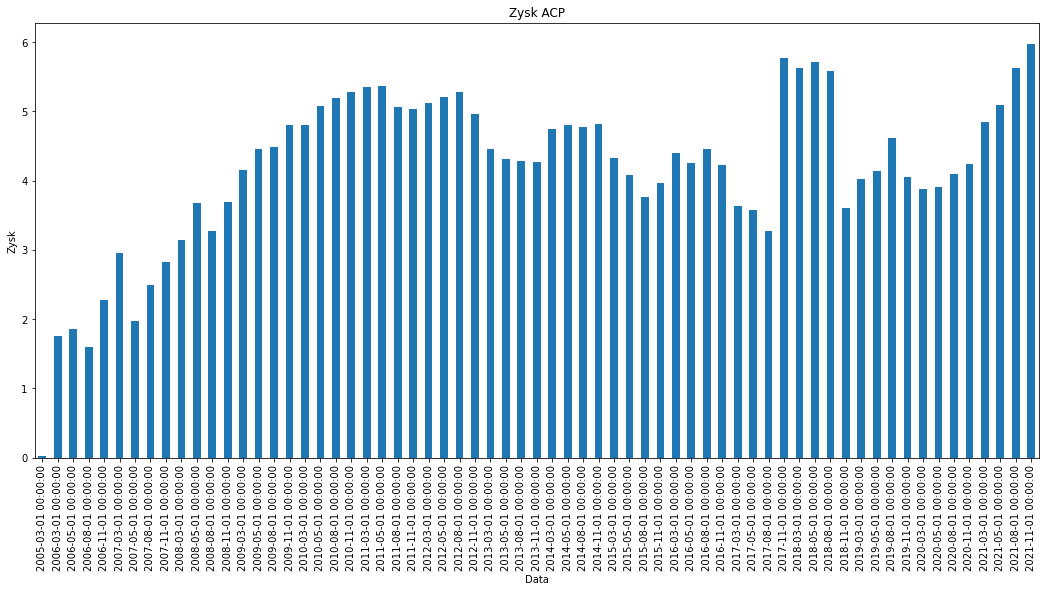

In [16]:
import matplotlib.dates as mdates

ax = fundamental_data.loc[fundamental_data['Spółka'] == 'ACP', ['Data', 'Zysk']].plot.bar(x='Data', y='Zysk',
                                                                                                 xlabel='Data',
                                                                                                 ylabel='Zysk',
                                                                                                 legend=False,
                                                                                                 title='Zysk ACP',
                                                                                                 figsize = (18,8),
                                                                                                 rot=90);

myFmt = mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(myFmt)


# every_nth = 4
# for n, label in enumerate(ax.xaxis.get_ticklabels()):
#     if n % every_nth != 0:
#         label.set_visible(False)

In [8]:
acp_data = stock_data.loc[(stock_data['Spółka'] == 'ACP') & (stock_data['Data'] > pd.Timestamp(2004, 1, 1))]

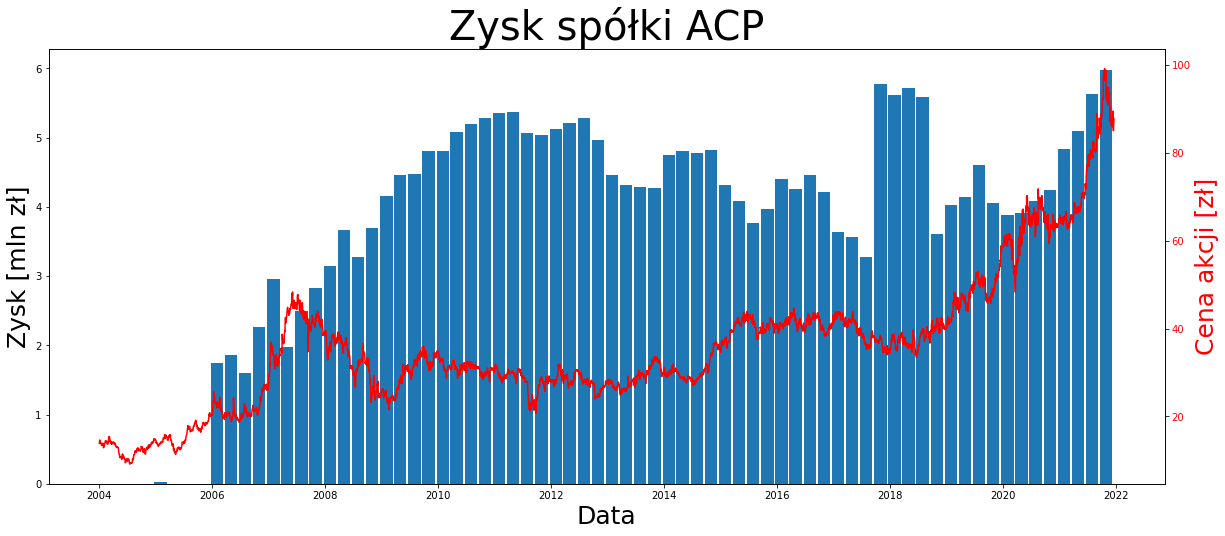

In [56]:
fig, ax1 = plt.subplots(figsize=(20,8))

ax1.bar(fundamental_data.loc[fundamental_data['Spółka'] == 'ACP', 'Data'], fundamental_data.loc[fundamental_data['Spółka'] == 'ACP', 'Zysk'], width=80)
ax1.set_xlabel('Data', fontsize=25)
ax1.set_ylabel('Zysk [mln zł]', fontsize=25)
ax1.set_title('Zysk spółki ACP', fontsize=40)

ax2 = ax1.twinx()
ax2.plot(acp_data['Data'], acp_data['Zamkniecie'], color='r')
ax2.tick_params(axis='y', labelcolor='r')
ax2.set_ylabel('Cena akcji [zł]', color='r', fontsize=25);